*   이전 실습 정확도 : 0.98xx
*   같은 데이터셋에 CNN을 적용해보면 정확도가 올라갈까?

In [9]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping

import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

seed = 0
np.random.seed(seed)
tf.compat.v1.set_random_seed(3)

# MNIST 데이터 불러오기
(X_train, Y_class_train), (X_test, Y_class_test) = mnist.load_data()

# 속성의 차원 변환 
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255        
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255

# 클래스의 원핫인코딩
Y_train = np_utils.to_categorical(Y_class_train, 10)
Y_test = np_utils.to_categorical(Y_class_test, 10)

*   모델에 CNN(컨볼루션 신경망) 적용!
* Conv2D, MaxPooling2D, Dropout, Flatten

In [10]:
# CNN(컨볼루션 신경망) 모델의 설정
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu')) #strides=(2,2), padding='same'
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,  activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

#모델 실행 환경 설정
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#모델 시각화
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)              

In [11]:
# 모델의 성과 향상이 없으면 학습 중단
early_stopping_callback = EarlyStopping(monitor='val_loss', patience= 10)

# 모델 실행
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200, verbose=1, callbacks=[early_stopping_callback])

# 테스트셋 정확도 출력
print("Test Accuracy: %.4f" %(model.evaluate(X_test, Y_test)[1]))

Epoch 1/30
300/300 [==============================] - 4s 11ms/step - loss: 0.5401 - accuracy: 0.8297 - val_loss: 0.0549 - val_accuracy: 0.9836
Epoch 2/30
300/300 [==============================] - 3s 10ms/step - loss: 0.0953 - accuracy: 0.9723 - val_loss: 0.0403 - val_accuracy: 0.9862
Epoch 3/30
300/300 [==============================] - 3s 10ms/step - loss: 0.0654 - accuracy: 0.9800 - val_loss: 0.0360 - val_accuracy: 0.9879
Epoch 4/30
300/300 [==============================] - 3s 10ms/step - loss: 0.0564 - accuracy: 0.9829 - val_loss: 0.0337 - val_accuracy: 0.9893
Epoch 5/30
300/300 [==============================] - 3s 10ms/step - loss: 0.0455 - accuracy: 0.9856 - val_loss: 0.0294 - val_accuracy: 0.9905
Epoch 6/30
300/300 [==============================] - 3s 10ms/step - loss: 0.0397 - accuracy: 0.9877 - val_loss: 0.0307 - val_accuracy: 0.9896
Epoch 7/30
300/300 [==============================] - 3s 10ms/step - loss: 0.0340 - accuracy: 0.9887 - val_loss: 0.0298 - val_accuracy: 0.9908

*   정확도 : 0.98 -> 0.99


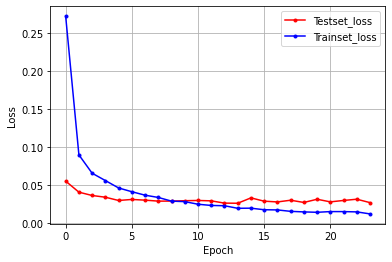

In [12]:
plt.plot(history.history['val_loss'], marker='.', c="red", label='Testset_loss')
plt.plot(history.history['loss'], marker='.', c="blue", label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()